# Asignement 3 = Stag Hunt model 
By Māra Učelniece 

- Response : there is not a specific data set we have to use, but just apply the evaluation of the structures to the EV's case that we are attempting to create policy interventions for. 

### Task : 
Evaluate how varying structures relate to policy and in which cases they might apply. 
   

In [1]:
# Imports 
    # Copied from exmaple notebook 
    
from mesa import Agent, Model
from mesa.time import SimultaneousActivation
from mesa.space import NetworkGrid
from mesa.datacollection import DataCollector
import networkx as nx
import numpy as np
import pandas as pd
import csv
import random
from typing import Iterable, List, Dict
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed


# Can import the functions from the course_matterial 
    # Example : from file import function
# from course_matterial.ev_core import *     
    # Example to import all functions
        # from ./course_matterial/ev_core.py import *
#print("Done")

C:\Users\Mara\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Mara\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## 0. Implement a network agent based model

In [2]:
from new_core import *
#%run new_core.py
print("Done")

Done


## 1. Baseline System Analysis

In [4]:
# Evaluate trough plots 
# Noah doing this part 

## 2. Network Structure Analysis

Seems that the follwoing will be done with plots 
- speed of adoption,
- probability of reaching the high-adoption equilibrium,
- cluster formation,
- network-specific sensitivity to tipping

In [5]:
# Mara doing this part   

# Mainly could use ev_plotting for this,
    # but there is also some matterial in ev_experiments

In [3]:
# Speed of adoption

    # Quantified in a number
def calculate_adoption_rate(X_traj: np.ndarray) -> float:
    initial_adoption = X_traj[0]
    final_adoption = X_traj[-1]
    total_steps = len(X_traj)
    return (final_adoption - initial_adoption) / total_steps
    
    # Time to treashold ~> high adoption
        # May not capture overall dynamics 
def time_to_reach_threshold(X_traj: np.ndarray, threshold: float) -> int:
    for t, X in enumerate(X_traj):
        if X >= threshold:
            return t
    return len(X_traj)  # Return total steps if threshold not reached

    # Time series analysis : easy to interpret 
def plot_time_series(X_traj: np.ndarray, I_traj: np.ndarray, out_dir: str, X0: float, I0: float):
    t = np.arange(len(X_traj))
    plt.figure(figsize=(6, 4))
    plt.plot(t, X_traj, label="X(t)")
    plt.plot(t, I_traj, label="I(t)")
    plt.xlabel("time step")
    plt.ylabel("value")
    plt.title(f"Time series X/I  X0={X0:.2f}, I0={I0:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, f"timeseries_X0_{int(X0*100)}_I0_{int(I0*100)}.png"))
    plt.close()


# Probabaility of reaching high-adoption equilibrium 
    # Finan adoption fractio, but no account for fluctuation 
def calculate_final_adoption(X_traj: np.ndarray) -> float:
    return X_traj[-1]
    
    # Stability analysis 
def is_high_adoption_equilibrium(X_traj: np.ndarray, threshold: float) -> bool:
    return np.mean(X_traj[-10:]) >= threshold  # Check last 10 steps for stability

    # Probalistic measure to reach high adoption
def monte_carlo_high_adoption_probability(trials: int, model_params: dict, threshold: float) -> float:
    successes = 0
    for _ in range(trials):
        final_adoption, _ = run_trial(**model_params)
        if final_adoption >= threshold:
            successes += 1
    return successes / trials

# Cluster formation 
    # Clustering coeficient analysis ~> tendency 
def calculate_clustering_coefficient(G: nx.Graph) -> float:
    return nx.average_clustering(G)

    # Spatial Adoption patterns  
def plot_spatial_adoption(G: nx.Graph, node_agent_map: Dict[int, EVAgent], out_dir: str):
    fig, ax = plt.subplots(figsize=(6,6))
    pos = nx.spring_layout(G, seed=42)
    color_map = ["green" if agent.strategy=="C" else "red" for agent in node_agent_map.values()]
    nx.draw(G, pos, node_color=color_map, with_labels=True, ax=ax)
    plt.savefig(os.path.join(out_dir, "spatial_adoption.png"))
    plt.close(fig)  



In [4]:
# Network-Specific sesnitivity to tipping 

    # Sensitivity analysis 
        # qunatifying impact of parameter changes on adoption 
def sensitivity_analysis(network_type: str, param_range: Iterable[float], model_params: dict, out_dir: str):
    results = []
    for param in param_range:
        model_params['beta_I'] = param
        final_adoption, _ = run_trial(**model_params)
        results.append(final_adoption)
    plt.plot(param_range, results, label=network_type)
    plt.xlabel('Parameter Value')
    plt.ylabel('Final Adoption')
    plt.title(f'Sensitivity Analysis for {network_type}')
    plt.legend()
    plt.savefig(os.path.join(out_dir, f"sensitivity_{network_type}.png"))
    plt.close()
    

    # Topping point estimation 
        # identifying critical points 
def estimate_tipping_point(X0_vals: List[float], I0_vals: List[float], model_params: dict, threshold: float, out_dir: str):
    tipping_points = []
    for X0 in X0_vals:
        for I0 in I0_vals:
            model_params['X0_frac'] = X0
            model_params['I0'] = I0
            final_adoption, _ = run_trial(**model_params)
            if final_adoption >= threshold:
                tipping_points.append((X0, I0))
    plt.scatter(*zip(*tipping_points))
    plt.xlabel('Initial Adoption X0')
    plt.ylabel('Initial Infrastructure I0')
    plt.title('Tipping Points')
    plt.savefig(os.path.join(out_dir, "tipping_points.png"))
    plt.close()
    
    
    # Phase plot analysis 
        # visualisation between adoption and infustructutre 
def plot_phase_trajectory(X_traj: np.ndarray, I_traj: np.ndarray, out_dir: str, X0: float, I0: float):
    plt.figure(figsize=(5, 5))
    plt.plot(I_traj, X_traj, marker=".", linewidth=1)
    plt.xlabel("I(t)")
    plt.ylabel("X(t)")
    plt.title(f"Phase plot X vs I  X0={X0:.2f}, I0={I0:.2f}")
    plt.tight_layout()
    plt.savefig(os.path.join(out_dir, f"phase_X0_{int(X0*100)}_I0_{int(I0*100)}.png"))
    plt.close()

In [8]:
# Final adoption 

def main():
    out_dir = "output_second_part"
    os.makedirs(out_dir, exist_ok=True)

    # ---- Config ----
    a0 = 2.0
    b = 1.0
    g_I = 0.05
    beta_I = 2.0

    network_type = "ER" # WR and BA, ER 
    n_nodes = 200
    p = 0.05
    m = 2

    X0_frac = 0.1 # This adjust 
    I0 = 0.5 # This as well 

    strategy_choice_func = "imitate"
    T = 200
    threshold = 0.9
    trials = 30

    model_params = {
        "X0_frac": X0_frac,
        "I0": I0,
        "a0": a0,
        "beta_I": beta_I,
        "b": b,
        "g_I": g_I,
        "T": T,
        "network_type": network_type,
        "n_nodes": n_nodes,
        "p": p,
        "m": m,
        "seed": 42,
        "strategy_choice_func": strategy_choice_func,
        "record_trajectory": True,
    }

    # ---- Run a single trial ----
    final_adoption, (X_traj, I_traj) = run_trial(**model_params)

    # ---- Adoption metrics ----
    adoption_rate = calculate_adoption_rate(X_traj)
    time_to_thresh = time_to_reach_threshold(X_traj, threshold)
    final_adopt = calculate_final_adoption(X_traj)
    high_eq = is_high_adoption_equilibrium(X_traj, threshold)
    high_prob = monte_carlo_high_adoption_probability(trials, model_params, threshold)

    print(f"Final adoption: {final_adopt:.3f}")
    print(f"Adoption rate: {adoption_rate:.4f} per step")
    print(f"Time to reach threshold {threshold}: {time_to_thresh} steps")
    print(f"High adoption equilibrium: {high_eq}")
    print(f"Probability of reaching high adoption (Monte Carlo {trials} trials): {high_prob:.3f}")

    # ---- Network metrics ----
    G = EVStagHuntModel(
        initial_ev=int(round(X0_frac * n_nodes)),
        a0=a0,
        beta_I=beta_I,
        b=b,
        g_I=g_I,
        I0=I0,
        seed=42,
        network_type=network_type,
        n_nodes=n_nodes,
        p=p,
        m=m,
        strategy_choice_func=strategy_choice_func
    ).G

    clustering = calculate_clustering_coefficient(G)
    print(f"Average clustering coefficient: {clustering:.3f}")

    
    # ---- Spatial adoption ----
    node_agent_map = {i: EVAgent(i, None, "D") for i in G.nodes()}
    for i, agent in enumerate(node_agent_map.values()):
        agent.strategy = "C" if i < int(final_adoption * n_nodes) else "D"

    plot_spatial_adoption(G, node_agent_map, out_dir)
    plot_time_series(X_traj, I_traj, out_dir, X0_frac, I0)

    print("Analysis completed. Plots and metrics saved to:", out_dir)

    
    # Network-specific anaklysis 

    print("Running sensitivity analysis...")
    beta_range = np.linspace(0.5, 4.0, 15)
    sensitivity_analysis(network_type, beta_range, model_params.copy(), out_dir)

    print("Estimating tipping points...")
    X0_vals = np.linspace(0.0, 0.3, 8)
    I0_vals = np.linspace(0.0, 1.0, 8)
    estimate_tipping_point(X0_vals, I0_vals, model_params.copy(), threshold, out_dir)

    plot_phase_trajectory(X_traj, I_traj, out_dir, X0_frac, I0)
        
    print("Extended analysis complete.")
    

    
if __name__ == "__main__":
    main()

Final adoption: 0.000
Adoption rate: -0.0003 per step
Time to reach threshold 0.9: 400 steps
High adoption equilibrium: False
Probability of reaching high adoption (Monte Carlo 30 trials): 0.000
Average clustering coefficient: 0.046
Analysis completed. Plots and metrics saved to: output_second_part
Running sensitivity analysis...
Estimating tipping points...
Extended analysis complete.


In [17]:
# only 
#Probability of reaching high adoption (Monte Carlo 30 trials): 0.000
# Average clustering coefficient: 0.046

def main():
    
    # ---- Config ----
    a0 = 2.0
    b = 1.0
    g_I = 0.05
    beta_I = 2.0

    network_type = "WS" # WS and BA, ER 
    n_nodes = 200
    p = 0.05
    m = 2

    X0_frac = 0.1 # This adjust 10 and 30 , 50 
    I0 = 0.00 # This as well 0, 20 and 50 

    strategy_choice_func = "imitate"
    T = 200
    threshold = 0.9 
    trials = 30

    model_params = {
        "X0_frac": X0_frac,
        "I0": I0,
        "a0": a0,
        "beta_I": beta_I,
        "b": b,
        "g_I": g_I,
        "T": T,
        "network_type": network_type,
        "n_nodes": n_nodes,
        "p": p,
        "m": m,
        "seed": 42,
        "strategy_choice_func": strategy_choice_func,
        "record_trajectory": True,
    }

    # ---- Run a single trial ----
    final_adoption, (X_traj, I_traj) = run_trial(**model_params)
    
    adoption_rate = calculate_adoption_rate(X_traj)
    print(f"Adoption rate: {adoption_rate:.4f} per step")
    
    high_prob = monte_carlo_high_adoption_probability(trials, model_params, threshold)
    print(f"Probability of reaching high adoption (Monte Carlo {trials} trials): {high_prob:.3f}")
   


    # ---- Network metrics ----
    G = EVStagHuntModel(
        initial_ev=int(round(X0_frac * n_nodes)),
        a0=a0,
        beta_I=beta_I,
        b=b,
        g_I=g_I,
        I0=I0,
        seed=42,
        network_type=network_type,
        n_nodes=n_nodes,
        p=p,
        m=m,
        strategy_choice_func=strategy_choice_func
    ).G

    clustering = calculate_clustering_coefficient(G)
    print(f"Average clustering coefficient: {clustering:.3f}")
    
if __name__ == "__main__":
    main()

Adoption rate: 0.0023 per step
Probability of reaching high adoption (Monte Carlo 30 trials): 1.000
Average clustering coefficient: 0.444


### Result evaluation 
After a few runs : 
- ER :
    - If the adoption rte is even sligtly negative, with even values of -0.0005, then the final adoption is 0 not 1. 
    - The average clustering coeficient is about 0.5 in with current adjusments inn  almost all of teh parameters .

- WS 
.... 

### Discussion with Noah

Just stick to the one value of clustering coeficient for cluster formaton evaluation, yes? 

For the time series plot adjsutemnts they will depend on the policy implementations that we are going to discuss 

        Infastructure, and time 

For the sensitivity check heatmap and the possible three implemented. 


#### Task further:  

For policy intervention => the network represents the area, but as a general depiction, as they do not fully represtent ... 
    
Mara = infastructure shocks 

    Do the comparison with local as high centrality vs global 
    
    Do global frisrt and then base local on the targetted seeding noah does . 
    
    General vs targeted infastructure schocks -> now what i do 
    
    
Noah = targeted seeding 


## 3. Policy Intervention Designand Evaluation

In [11]:
# For this one the ev_experiments mainly perevelent: 
    # policy_subsidy_factory = Create a policy that temporarily boosts coordination payoffs
    # policy_infrastructure_boost_factory = Create a policy that injects infrastructure at a specific step
    
# However, these are only two interventions, and we wnat to test possibly more or others 
    # Can still be used for insparation / a basis to start from 

    
# For degree centrality ... 

-------------------
# STOP HERE
----------------------

In [12]:
# Copied from Noah 

# --- 1. Helper Function for Targeted Seeding ---
def apply_seeding(model, X0_frac, method="random"):
    """
    Applies specific seeding strategies to the provided model instance.
    Adapts the logic to work with model.node_agent_map.
    """
    nodes = list(model.G.nodes())
    total_nodes = len(nodes)
    k_ev = int(round(X0_frac * total_nodes))
    
    # Reset all agents to Defect first
    for agent in model.node_agent_map.values():
        agent.strategy = "D"
        agent.next_strategy = "D"

    target_nodes = []

    if method == "random":
        target_nodes = random.sample(nodes, k_ev)
        
    elif method == "degree":
        # Sort nodes by degree (high to low)
        degrees = dict(model.G.degree())
        # Sort keys by value descending
        sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)
        target_nodes = sorted_nodes[:k_ev]

    # Apply "C" strategy to chosen targets
    for node_id in target_nodes:
        model.node_agent_map[node_id].strategy = "C"
        model.node_agent_map[node_id].next_strategy = "C"

# --- 2. Simulation Runner ---
def run_batch(n_trials, steps, method, params):
    """
    Runs a batch of simulations and returns trajectories and final states.
    """
    X_trajectories = []
    I_trajectories = []
    final_X = []
    final_I = []

    for i in range(n_trials):
        # Initialize model with 0 initial EVs so we can manually seed them
        model = EVStagHuntModel(
            initial_ev=0, 
            a0=params['a0'], beta_I=params['beta_I'], b=params['b'], 
            g_I=params['g_I'], I0=params['I0'], 
            seed=None, # Random seed for stochasticity
            network_type=params['network_type'], 
            n_nodes=params['n_nodes'], p=params['p'], m=params['m'],
            strategy_choice_func=params['func']
        )
        
        # Apply the specific seeding method (Random vs Degree)
        apply_seeding(model, params['X0_frac'], method=method)
        
        # storage for this trial
        trial_X = []
        trial_I = []
        
        # Run time steps
        for t in range(steps):
            trial_X.append(model.get_adoption_fraction())
            trial_I.append(model.infrastructure)
            model.step()
            
        # Capture final state
        trial_X.append(model.get_adoption_fraction())
        trial_I.append(model.infrastructure)
        
        X_trajectories.append(trial_X)
        I_trajectories.append(trial_I)
        final_X.append(trial_X[-1])
        final_I.append(trial_I[-1])

    return np.array(X_trajectories), np.array(I_trajectories), np.array(final_X), np.array(final_I)

In [23]:
def execute_simulations_and_visualize(TRIALS, STEPS, PARAMS):
    # --- 4. Execute Simulations ---
    print("Running Baseline (Random Seeding)...")
    base_X_traj, base_I_traj, base_final_X, base_final_I = run_batch(TRIALS, STEPS, "random", PARAMS)

    print("Running Intervention (Degree Seeding)...")
    seed_X_traj, seed_I_traj, seed_final_X, seed_final_I = run_batch(TRIALS, STEPS, "degree", PARAMS)

    # Calculate Means
    base_mean_X = np.mean(base_X_traj, axis=0)
    base_mean_I = np.mean(base_I_traj, axis=0)
    seed_mean_X = np.mean(seed_X_traj, axis=0)
    seed_mean_I = np.mean(seed_I_traj, axis=0)

    # --- 5. Visualization ---
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    time_axis = range(STEPS + 1)

    # Style settings
    color_X = '#1f77b4' # Blue
    color_I = '#ff7f0e' # Orange
    alpha_hist = 0.6
    bins_count = 20

    # --- Top Left: Baseline Dynamics ---
    axs[0, 0].plot(time_axis, base_mean_X, label=r'Mean Adoption ($X^*$)', color=color_X, linewidth=2)
    axs[0, 0].plot(time_axis, base_mean_I, label=r'Mean Infrastructure ($I^*$)', color=color_I, linewidth=2, linestyle='--')
    axs[0, 0].set_title(r'Baseline: Random Seeding ($X_0=0.20$ $I_0=0.00$)', fontsize=12, fontweight='bold')
    axs[0, 0].set_xlabel('Time Step')
    axs[0, 0].set_ylabel('Fraction')
    axs[0, 0].set_ylim(0, 1.05)
    axs[0, 0].grid(True, alpha=0.3)
    axs[0, 0].legend()

    # --- Bottom Left: Baseline Histogram ---
    axs[1, 0].hist(
        [base_final_X, base_final_I], # Group data into a list for combined plotting
        bins=bins_count, 
        range=(0,1), 
        alpha=alpha_hist, 
        color=[color_X, color_I], # Set colors for the two datasets
        label=['Final Adoption ($X$)', 'Final Infrastructure ($I$)']
    )
    axs[1, 0].set_title(r'Baseline: Distribution of Final Outcomes ($X_0=0.20$ $I_0=0.00$)', fontsize=12, fontweight='bold')
    axs[1, 0].set_xlabel('Value (0-1)')
    axs[1, 0].set_ylabel('Frequency')
    axs[1, 0].set_ylim (0, 105)
    axs[1, 0].legend()

    # --- Top Right: Targeted Seeding Dynamics ---
    axs[0, 1].plot(time_axis, seed_mean_X, label=r'Mean Adoption ($X^*$)', color=color_X, linewidth=2)
    axs[0, 1].plot(time_axis, seed_mean_I, label=r'Mean Infrastructure ($I^*$)', color=color_I, linewidth=2, linestyle='--')
    axs[0, 1].set_title(r'Intervention: Degree Centrality Seeding ($X_0=0.20$ $I_0=0.00$)', fontsize=12, fontweight='bold')
    axs[0, 1].set_xlabel('Time Step')
    axs[0, 1].set_ylabel('Fraction')
    axs[0, 1].set_ylim(0, 1.05)
    axs[0, 1].grid(True, alpha=0.3)
    axs[0, 1].legend()

    # --- Bottom Right: Targeted Seeding Histogram ---
    axs[1, 1].hist(
        [seed_final_X, seed_final_I], # Group data into a list for combined plotting
        bins=bins_count, 
        range=(0,1), 
        alpha=alpha_hist, 
        color=[color_X, color_I], # Set colors for the two datasets
        label=['Final Adoption ($X$)', 'Final Infrastructure ($I$)']
    )
    axs[1, 1].set_title(r'Intervention: Distribution of Final Outcomes ($X_0=0.20$ $I_0=0.00$)', fontsize=12, fontweight='bold')
    axs[1, 1].set_xlabel('Value (0-1)')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_ylim (0, 105)
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()



# Infastructure shocks 

- BA : 
Baseline very quickly goes to just above 0. The inital adoption rate falls, the infastructure slight increases above 0 to match the amount of adopters, this shift is clearly reflected in the histogram with only few adaptors and mainly defectors. 

For degree targeted seeding in the initial phase, 


----------
Isnt targeted seeding in the firts step the same as an infastructure shock in the fisrt time step => that shoiuld not be used as a base line

=? normal adoption plot ?= 




### Put in policy output folder 

### Run all the models  with random and degree centrality 


In [15]:
# New run batch withouth final states 
    # Without final states 
    
    
def run_batch_single_shock(n_trials, steps, method, params, shock_time, shock_amount):
    """
    Runs simulations with a single global infrastructure shock at a given time.
    shock_amount: additive change to I (e.g., +0.2 or -0.1)
    shock_time: timestep where shock occurs
    """
    X_trajectories = []
    I_trajectories = []

    for _ in range(n_trials):
        model = EVStagHuntModel(
            initial_ev=0,
            a0=params['a0'], beta_I=params['beta_I'], b=params['b'],
            g_I=params['g_I'], I0=params['I0'], seed=None,
            network_type=params['network_type'], n_nodes=params['n_nodes'],
            p=params['p'], m=params['m'],
            strategy_choice_func=params['func']
        )

        apply_seeding(model, params['X0_frac'], method)

        trial_X = []
        trial_I = []

        for t in range(steps):
            # Apply global infrastructure shock
            if t == shock_time:
                model.infrastructure = np.clip(model.infrastructure + shock_amount, 0, 1)

            trial_X.append(model.get_adoption_fraction())
            trial_I.append(model.infrastructure)
            model.step()

        # Add final state
        trial_X.append(model.get_adoption_fraction())
        trial_I.append(model.infrastructure)

        X_trajectories.append(trial_X)
        I_trajectories.append(trial_I)

    return np.array(X_trajectories), np.array(I_trajectories)


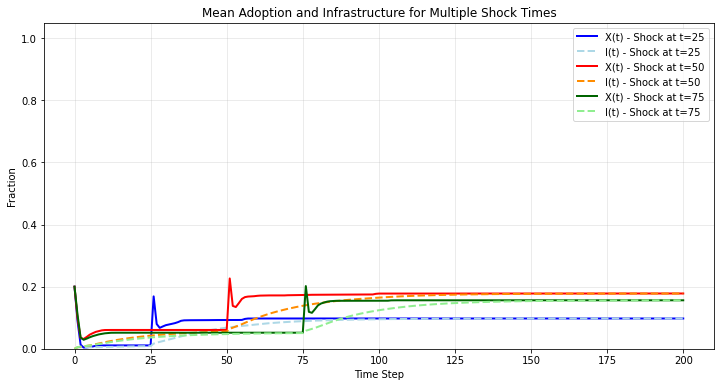

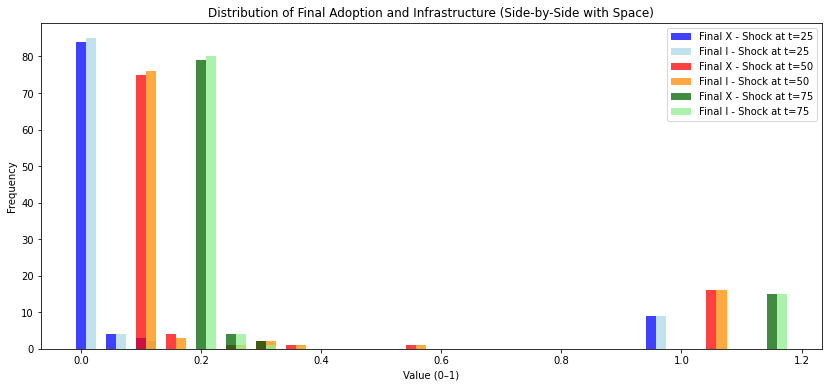

In [19]:
# General infastructure shocks

def run_multiple_single_shocks_overlay(n_trials, steps, method, params, shock_times, shock_amount):
    all_X_traj, all_I_traj, labels = [], [], []
    for t_shock in shock_times:
        X_traj, I_traj = run_batch_single_shock(
            n_trials, steps, method, params,
            shock_time=t_shock, shock_amount=shock_amount
        )
        all_X_traj.append(X_traj)
        all_I_traj.append(I_traj)
        labels.append(f"Shock at t={t_shock}")

    # --- Mean Trajectories Plot ---
    time_axis = range(steps + 1)
    plt.figure(figsize=(12,6))

    colors_X = ["blue", "red", "darkgreen"]   # X colors for each shock
    colors_I = ["lightblue", "darkorange", "lightgreen"]  # I colors for each shock

    for i in range(len(shock_times)):
        mean_X = np.mean(all_X_traj[i], axis=0)
        mean_I = np.mean(all_I_traj[i], axis=0)
        plt.plot(time_axis, mean_X, color=colors_X[i], label=f'X(t) - {labels[i]}', linewidth=2)
        plt.plot(time_axis, mean_I, color=colors_I[i], linestyle='--', label=f'I(t) - {labels[i]}', linewidth=2)

    plt.title("Mean Adoption and Infrastructure for Multiple Shock Times")
    plt.xlabel("Time Step")
    plt.ylabel("Fraction")
    plt.ylim(0,1.05)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # --- Side-by-Side Histogram with Space Between X and I ---
    plt.figure(figsize=(14,6))
    bins_count = 20
    bin_edges = np.linspace(0,1,bins_count+1)
    n_shocks = len(shock_times)
    total_width = (bin_edges[1]-bin_edges[0])
    width = total_width / 3  # smaller width to add space between X/I sets

    for i in range(n_shocks):
        final_X = all_X_traj[i][:,-1]
        final_I = all_I_traj[i][:,-1]
        offset_X = i*total_width*2   # space between shock sets
        offset_I = offset_X + width  # small gap between X and I bars

        plt.bar(bin_edges[:-1]+offset_X, np.histogram(final_X, bins=bin_edges)[0],
                width=width, color=colors_X[i], alpha=0.75, label=f'Final X - {labels[i]}')
        plt.bar(bin_edges[:-1]+offset_I, np.histogram(final_I, bins=bin_edges)[0],
                width=width, color=colors_I[i], alpha=0.75, label=f'Final I - {labels[i]}')

    plt.title("Distribution of Final Adoption and Infrastructure (Side-by-Side with Space)")
    plt.xlabel("Value (0–1)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Run the function
run_multiple_single_shocks_overlay(TRIALS, STEPS, "random", PARAMS, shock_times, shock_amount=0.25)

# Fix the one below  for the baseline 

# Random seeding is done now move to dagree cnetrality as targeted infastructure shocks 

This is strange for two reasons, one is that the values go above 1, whihc is strange when taking into account the fraction of adopters. 

In [20]:
def apply_targeted_shock(model, shock_frac, method="degree"):
    """
    Applies a one-time targeted adoption shock to currently non-adopting agents.
    """
    nodes = list(model.G.nodes())
    total_nodes = len(nodes)
    k_shock = int(round(shock_frac * total_nodes))

    # Identify current defectors only
    defectors = [
        n for n in nodes
        if model.node_agent_map[n].strategy == "D"
    ]

    if len(defectors) == 0:
        return

    if method == "random":
        targets = random.sample(defectors, min(k_shock, len(defectors)))

    elif method == "degree":
        degrees = dict(model.G.degree(defectors))
        targets = sorted(degrees, key=degrees.get, reverse=True)[:k_shock]

    for n in targets:
        model.node_agent_map[n].strategy = "C"
        model.node_agent_map[n].next_strategy = "C"

        
def run_batch_single_shock(
    n_trials, steps, method, params, shock_time, shock_amount
):
    """
    Runs simulations with NO targeted seeding at t=0.
    A single discrete shock is applied at shock_time.
    """
    X_trajectories = []
    I_trajectories = []

    for _ in range(n_trials):
        model = EVStagHuntModel(
            initial_ev=0,
            a0=params['a0'], beta_I=params['beta_I'], b=params['b'],
            g_I=params['g_I'], I0=params['I0'],
            seed=None,
            network_type=params['network_type'],
            n_nodes=params['n_nodes'], p=params['p'], m=params['m'],
            strategy_choice_func=params['func']
        )

        # ---- RANDOM BASELINE ONLY ----
        apply_seeding(model, params['X0_frac'], method="random")

        trial_X, trial_I = [], []

        for t in range(steps):
            trial_X.append(model.get_adoption_fraction())
            trial_I.append(model.infrastructure)

            # ---- DISCRETE TARGETED SHOCK ----
            if t == shock_time:
                apply_targeted_shock(
                    model,
                    shock_frac=shock_amount,
                    method=method
                )

            model.step()

        trial_X.append(model.get_adoption_fraction())
        trial_I.append(model.infrastructure)

        X_trajectories.append(trial_X)
        I_trajectories.append(trial_I)

    return np.array(X_trajectories), np.array(I_trajectories)

def run_multiple_single_shocks_overlay_adjusted(
    n_trials, steps, method, params, shock_times, shock_amount
):
    all_X_traj, all_I_traj, labels = [], [], []

    for t_shock in shock_times:
        X_traj, I_traj = run_batch_single_shock(
            n_trials, steps, method, params,
            shock_time=t_shock,
            shock_amount=shock_amount
        )
        all_X_traj.append(X_traj)
        all_I_traj.append(I_traj)
        labels.append(f"Shock at t={t_shock}")

    # ---------- Mean Trajectories ----------
    time_axis = range(steps + 1)
    plt.figure(figsize=(12, 6))

    colors_X = ["blue", "red", "darkgreen"]
    colors_I = ["lightblue", "darkorange", "lightgreen"]

    for i in range(len(shock_times)):
        plt.plot(
            time_axis,
            np.mean(all_X_traj[i], axis=0),
            color=colors_X[i],
            linewidth=2,
            label=f"X(t) – {labels[i]}"
        )
        plt.plot(
            time_axis,
            np.mean(all_I_traj[i], axis=0),
            color=colors_I[i],
            linestyle="--",
            linewidth=2,
            label=f"I(t) – {labels[i]}"
        )

    plt.title("Mean Adoption and Infrastructure\n(Discrete Targeted Shocks Only)")
    plt.xlabel("Time Step")
    plt.ylabel("Fraction")
    plt.ylim(0, 1.05)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

    # ---------- Side-by-Side Histograms ----------
    plt.figure(figsize=(14, 6))
    bins = np.linspace(0, 1, 21)
    width = 0.015

    for i in range(len(shock_times)):
        final_X = all_X_traj[i][:, -1]
        final_I = all_I_traj[i][:, -1]

        x_pos = bins[:-1] + i * (width * 3)

        plt.bar(
            x_pos,
            np.histogram(final_X, bins=bins)[0],
            width=width,
            color=colors_X[i],
            alpha=0.75,
            label=f"Final X – {labels[i]}"
        )
        plt.bar(
            x_pos + width, 
            np.histogram(final_I, bins=bins)[0],
            width=width,
            color=colors_I[i],
            alpha=0.75,
            label=f"Final I – {labels[i]}"
        )

    plt.title("Final Adoption and Infrastructure Distributions\n(Side-by-Side with Space)")
    plt.xlabel("Value (0–1)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    return np.array(all_X_traj), np.array(all_I_traj)


# CONFIGURATION for policies 

In [65]:
# ---  Configuration ---
# Parameters chosen to be near a tipping point where seeding matters
PARAMS = {
    'a0': 2.0,          
    'beta_I': 2,     # Strong feedback to allow tipping
    'b': 1.0,           # Defection payoff
    'g_I': 0.05,         # Infrastructure growth rate
    'I0': 0.00,          # Start with no infrastructure
    'X0_frac': 0.20,     # 10% Initial adopters (Low initial seed)
    'network_type': 'ER', # Scale-free networks show high sensitivity to hubs
    'n_nodes': 200,
    'p': 0.05,           # For ER/WS
    'm': 2,             # For BA (edges per new node)
    'func': 'imitate'
}

TRIALS = 100
STEPS = 200

shock_times = [25, 50, 75]

Running Baseline (Random Seeding)...
Running Intervention (Degree Seeding)...


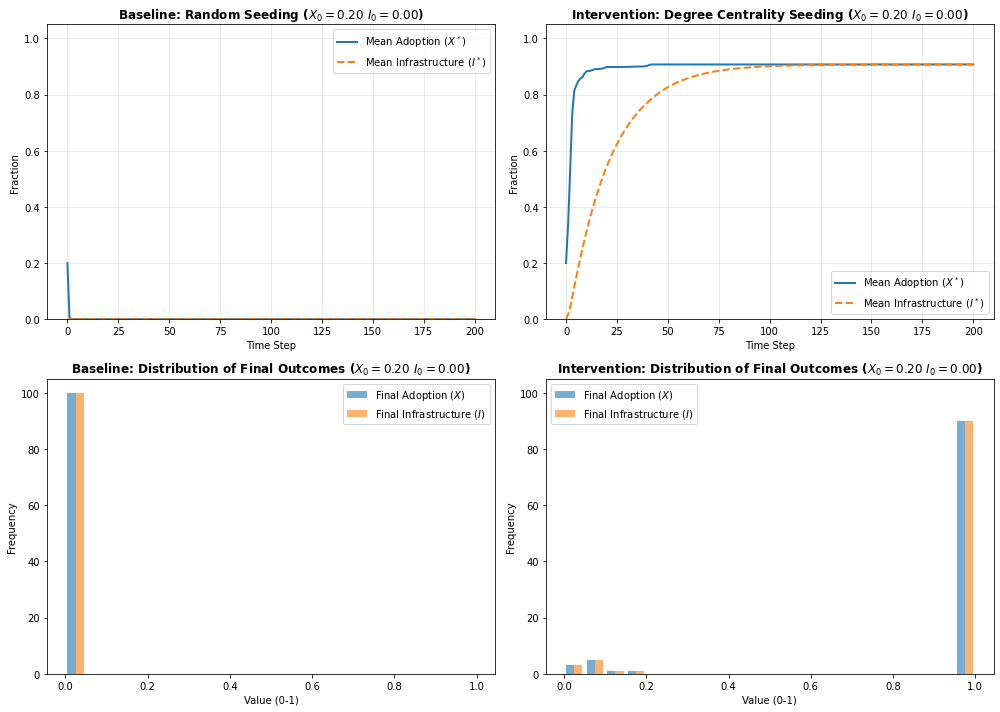

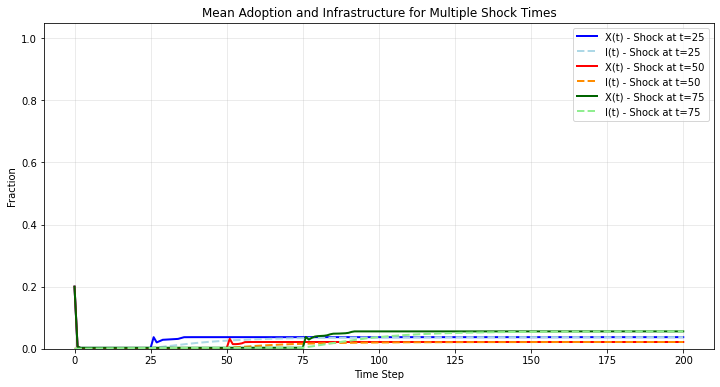

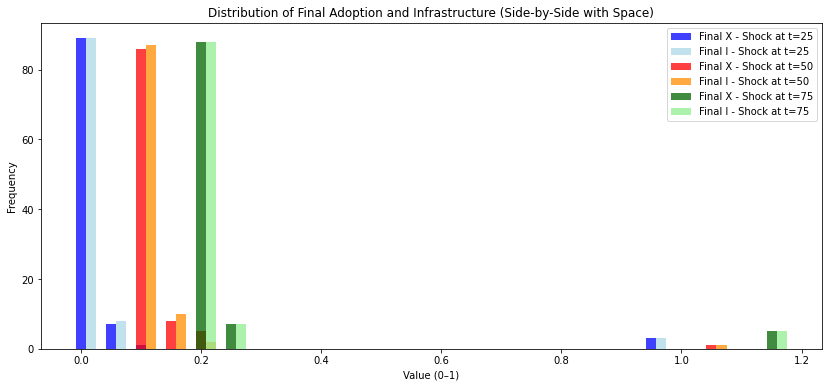

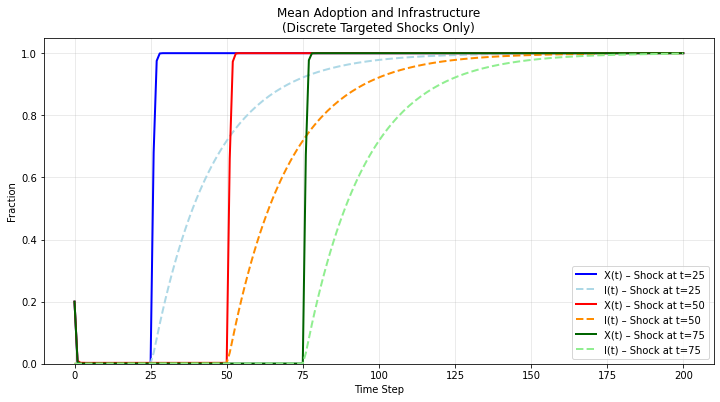

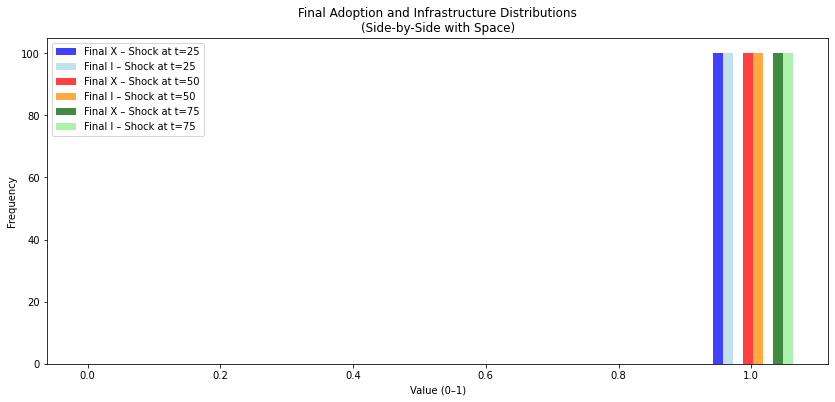

In [66]:
execute_simulations_and_visualize(TRIALS, STEPS, PARAMS)

run_multiple_single_shocks_overlay(TRIALS, STEPS, "random", PARAMS, shock_times, shock_amount=0.25)

X_shock, I_shock = run_multiple_single_shocks_overlay_adjusted(
    TRIALS,
    STEPS,
    method="degree",         
    params=PARAMS,
    shock_times=shock_times,
    shock_amount=0.25
)

This is perfcet for the dgeree with seefing at three points, but has the issue of stating with being seeded. 

        The system is not shock-driven; it is pre-conditioned

# Now could do the combo of all four 

In [ ]:
# Random Baseline, Global Shock, Degree Baseline, Targeted shock. 